In [1]:
from scipy.stats import bernoulli, binom, uniform, norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Bernoulli
***

In [2]:
p = 0.3
rv1 = bernoulli(p)

In [3]:
rv1.rvs(100)

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [4]:
rv1.stats('mvsk')

(array(0.3), array(0.21), array(0.87287156), array(-1.23809524))

In [5]:
rv1.pmf([0,1])

array([0.7, 0.3])

In [6]:
rv1.cdf([0,1]) # Cumulative distribution function

array([0.7, 1. ])

# Binomial
***

In [7]:
# A new pill is created that cures cancer, however, it has downsides. If you take this pill
# it has a 95% chance of curing you, otherwise the pill is fatal due to side effects.
# Let's say you distribute a pill to 40 different individuals that have cancer. Each person
# takes the pill.
# What is the probability that between 1 and 3 people will die?
# If each death results in a $7M settlement, what is the expected payout?

In [8]:
n = 40
p = 0.05
rv2 = binom(n, p)

In [9]:
rv2.stats('mvsk')

(array(2.), array(1.9), array(0.65292863), array(0.37631579))

In [10]:
# get 40 samples from the distribution
# each value represents the number of people out of 40 that will die from the drug
rv2.rvs(n)

array([2, 3, 1, 2, 4, 0, 2, 0, 2, 1, 1, 1, 3, 3, 2, 0, 2, 3, 4, 1, 1, 5,
       2, 0, 1, 6, 1, 2, 1, 3, 1, 4, 2, 1, 1, 3, 1, 1, 3, 1])

In [11]:
rv2.pmf(range(n+1))

array([1.28512157e-01, 2.70551909e-01, 2.77671696e-01, 1.85114464e-01,
       9.01215152e-02, 3.41513110e-02, 1.04850516e-02, 2.68038914e-03,
       5.81926590e-04, 1.08898543e-04, 1.77676570e-05, 2.55038139e-06,
       3.24390616e-07, 3.67730253e-08, 3.73260031e-09, 3.40517923e-10,
       2.80031186e-11, 2.08072708e-12, 1.39931938e-13, 8.52770815e-15,
       4.71268082e-16, 2.36224603e-17, 1.07374819e-18, 4.42276144e-20,
       1.64883650e-21, 5.55397558e-23, 1.68642983e-24, 4.60234262e-26,
       1.12463260e-27, 2.44929059e-29, 4.72670114e-31, 8.02495949e-33,
       1.18790519e-34, 1.51566850e-36, 1.64236525e-38, 1.48183331e-40,
       1.08321148e-42, 6.16336547e-45, 2.56095518e-47, 6.91215973e-50,
       9.09494702e-53])

In [12]:
rv2.cdf(range(n+1))

array([0.12851216, 0.39906407, 0.67673576, 0.86185022, 0.95197174,
       0.98612305, 0.9966081 , 0.99928849, 0.99987042, 0.99997932,
       0.99999708, 0.99999963, 0.99999996, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [13]:
probs = rv2.pmf([1, 2, 3]) # probability of death for 1 to 3 people
probs

array([0.27055191, 0.2776717 , 0.18511446])

In [14]:
# the probability that between 1 and 3people will die from the drug
probs.sum()

0.7333380679338366

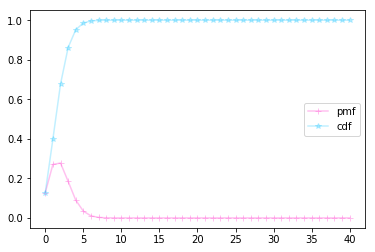

In [15]:
plt.plot(range(n+1), rv2.pmf(range(n+1)), marker='+', alpha=0.3, color='#ff33cc', label='pmf')
plt.plot(range(n+1), rv2.cdf(range(n+1)), marker='*', alpha=0.3, color='#33ccff', label='cdf')
plt.legend();

In [16]:
# expected payout
rv2.stats('m') * 7_000_000

14000000.0

# Normal
***

In [17]:
# you read on the internet that the average height of an adult
# female is 5 feet 4 inches, with a standard deviation of 1/2 foot.
# your company sells pants to shorter women. what is the probability 
# of randomly selecting a woman between 4'9" and 5'2" to be in your
# commercial?
# you company does not want to sell to the tallest, 10% of women.
# what height is the cutoff where you will not offer your services?

In [18]:
# mean = 60 + 4 = 64
# std = 6
# lower = 48 + 9 = 57
# upper = 60 + 2 = 62

rv3 = norm(64, 6)

In [19]:
rv3.stats('mvsk')

(array(64.), array(36.), array(0.), array(0.))

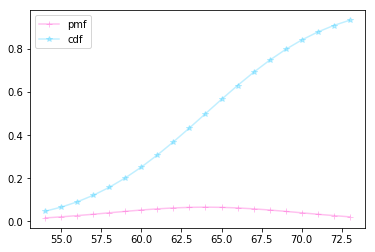

In [20]:
plt.plot(range(54, 74), rv3.pdf(range(54, 74)), marker='+', alpha=0.3, color='#ff33cc', label='pmf')
plt.plot(range(54, 74), rv3.cdf(range(54, 74)), marker='*', alpha=0.3, color='#33ccff', label='cdf')
plt.legend();

In [21]:
# cannot do because the space is NOT discrete
rv3.pdf(np.linspace(57, 62))

array([0.03366645, 0.03433614, 0.03500902, 0.03568477, 0.03636304,
       0.03704349, 0.03772576, 0.03840949, 0.03909429, 0.0397798 ,
       0.04046563, 0.04115137, 0.04183663, 0.042521  , 0.04320408,
       0.04388542, 0.04456463, 0.04524125, 0.04591487, 0.04658505,
       0.04725133, 0.04791329, 0.04857047, 0.04922242, 0.0498687 ,
       0.05050886, 0.05114243, 0.05176898, 0.05238805, 0.0529992 ,
       0.05360196, 0.05419591, 0.05478059, 0.05535556, 0.0559204 ,
       0.05647466, 0.05701792, 0.05754975, 0.05806975, 0.05857751,
       0.05907261, 0.05955468, 0.06002331, 0.06047814, 0.06091879,
       0.06134491, 0.06175614, 0.06215215, 0.06253261, 0.0628972 ])

In [22]:
# wrong
rv3.pdf(np.linspace(57, 62)).sum()

2.4763904629507554

In [23]:
# subtracting 2 areas
a, b = rv3.cdf([57, 62])
a, b

(0.12167250457438122, 0.36944134018176367)

In [24]:
# probabilty of selecting a woman between 57 and 62 inches
b - a

0.24776883560738244

In [25]:
# almost 6 feet is the max height of your customer
rv3.ppf(.90)

71.6893093932676